In [252]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import style
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/CleanedKidneyDisease.csv


# Describing the dataset


In [253]:
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For prettier visualization
data = pd.read_csv("../input/dataset/CleanedKidneyDisease.csv")
data.head()  

,Unnamed: 0,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,O
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000.0,NaN,no,no,no,good,no,no,ckd,A
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,B
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,O
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300.0,4.6,no,no,no,good,no,no,ckd,A


**The above dataset is found in UCI repository the link for the same is given below: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease**

**we need to drop the extra index column**

In [254]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

**The above dataset description gives us the info about diffrent types of attributes**

In [256]:
data.shape

(400, 26)

**There are around 400 values in the dataset with 26 attributes**

**The following cell allows us to see what values each column/feature contains.
It also shows us how many times each value is repeated.**

In [257]:
 for col in data.columns:
    print(f"\n\nUnique Values in {col}:")
    print(data[col].value_counts())




Unique Values in Age (yrs):
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: Age (yrs), Length: 76, dtype: int64


Unique Values in Blood Pressure (mm/Hg):
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: Blood Pressure (mm/Hg), dtype: int64


Unique Values in Specific Gravity:
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: Specific Gravity, dtype: int64


Unique Values in Albumin:
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: Albumin, dtype: int64


Unique Values in Sugar:
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: Sugar, dtype: int64


Unique Values in Red Blood Cells:
normal      201
abnormal     47
Name: Red Blood Cells, dtype: int64


Unique Values in Pus Cells:
normal      259
abnormal     76
Name: Pus Cells, dtype: int64


Unique Values 

# Preprocessing

In [258]:
missing=data.isna().sum()
 

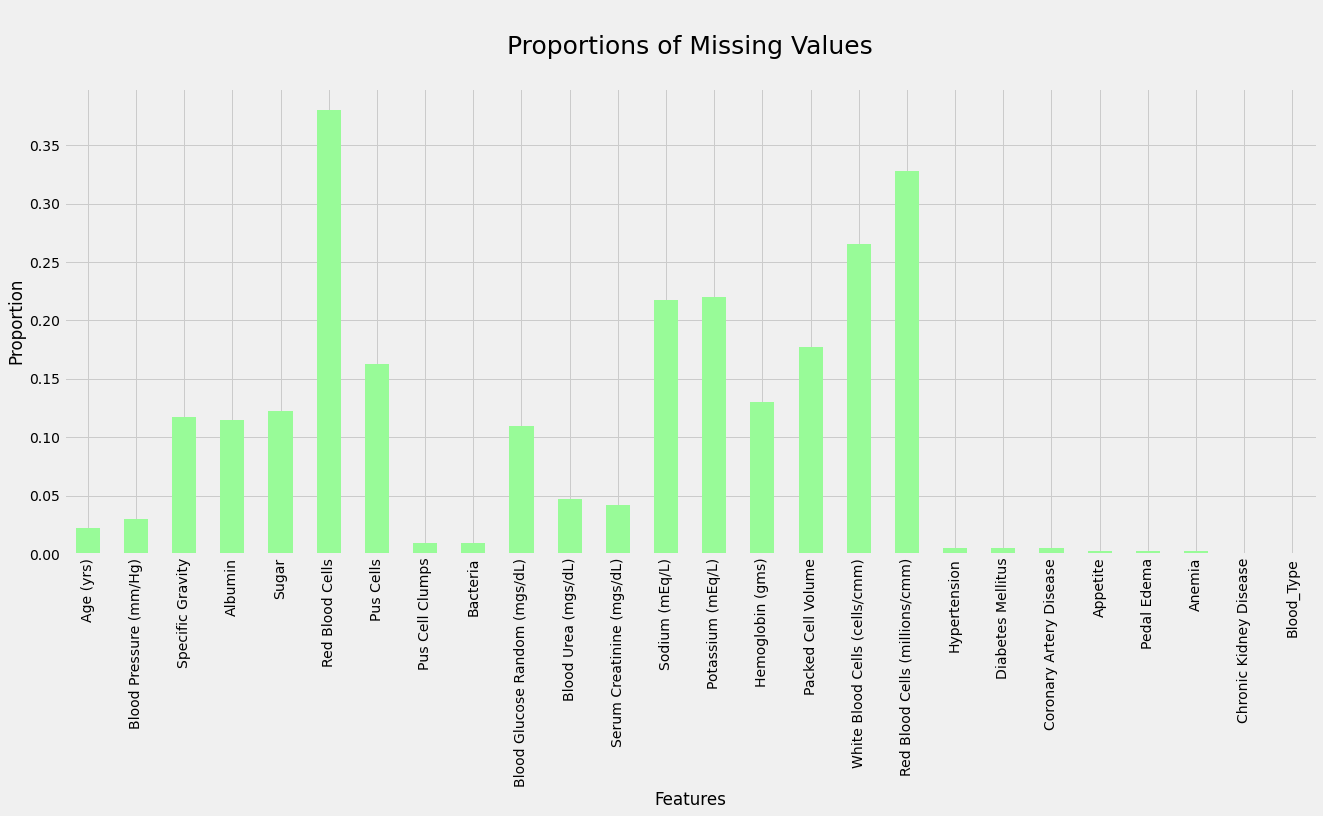

In [259]:
style.use("fivethirtyeight")
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen")  
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

**The above description shows that most of the attributes high number of Null values thus these must be handles appropriately so that these won't interfere in our prediction**

**we use Univariate analysis to replace the NULL values**

## Univariate Analysis

*** for age attribute:**

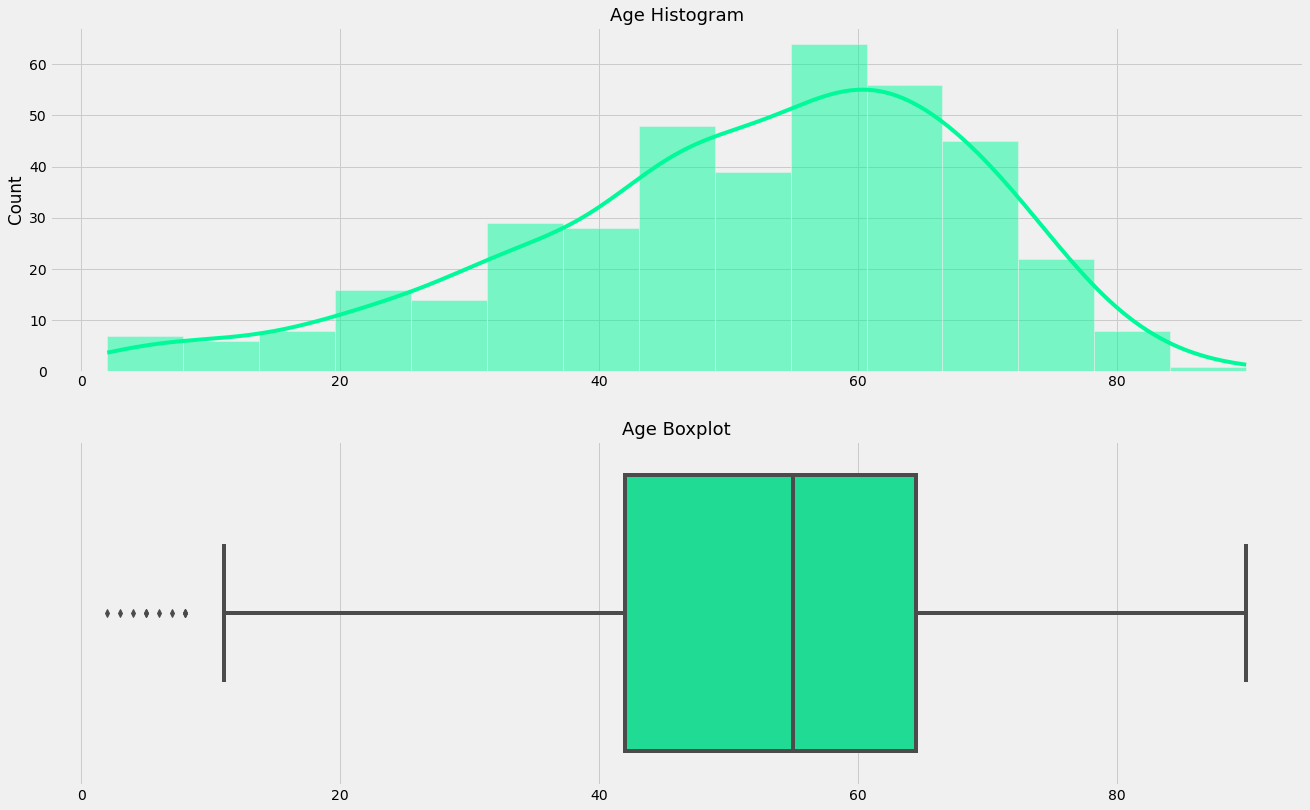

In [260]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13)) #subplots divides your graph into 2 parts
 
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=data, x="Age (yrs)", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("Age Histogram", fontsize=18)
axes[1].set_title("Age Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

In [261]:
print("mode:",data["Age (yrs)"].mode())
print("median:",data["Age (yrs)"].median())
print("mean:",data["Age (yrs)"].mean())    

mode: 0    60.0
dtype: float64
median: 55.0
mean: 51.48337595907928


we will fill the missing values with mean

In [262]:
data["Age (yrs)"].fillna(data["Age (yrs)"].mean(), inplace=True)

**Similarly for blood glucose**

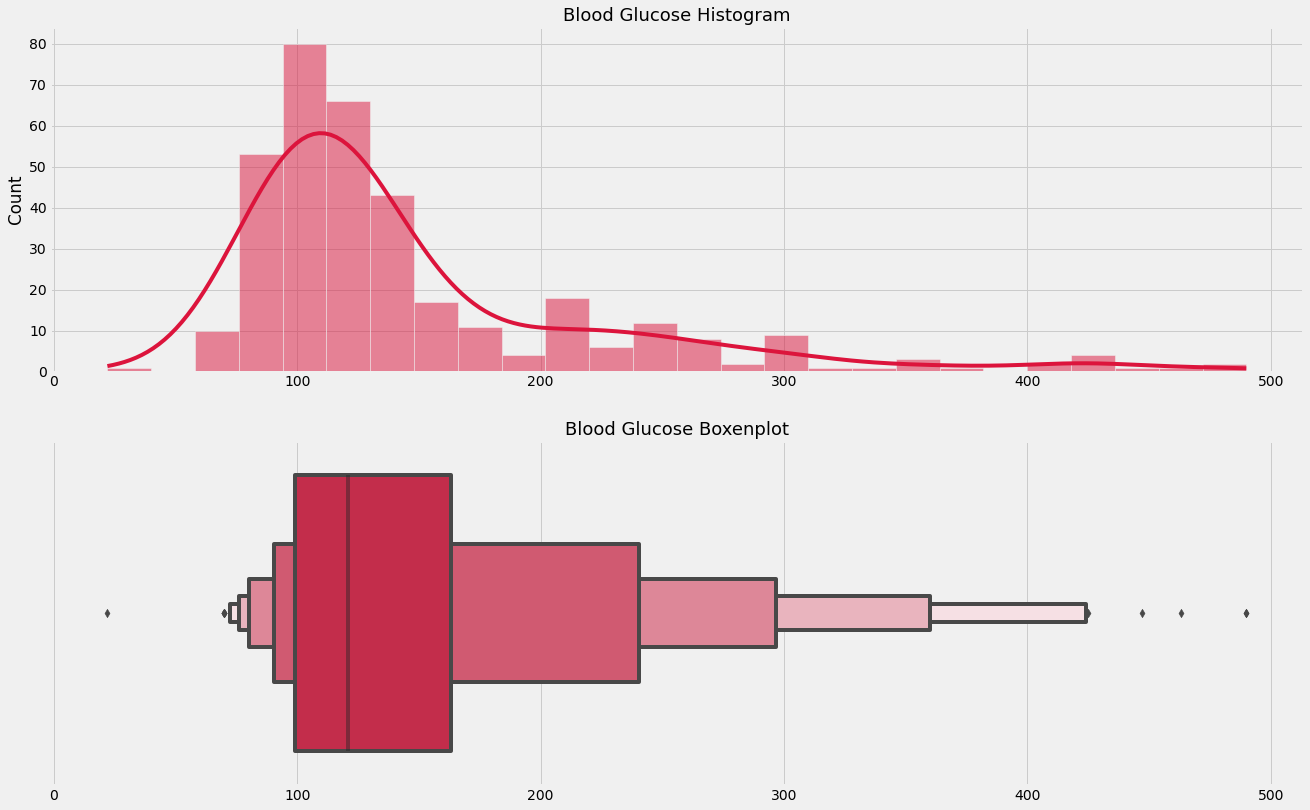

In [263]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Blood Glucose Random (mgs/dL)", kde=True, color="crimson", ax=axes[0])
sns.boxenplot(data=data, x="Blood Glucose Random (mgs/dL)", color="crimson", ax=axes[1])
axes[0].set_title("Blood Glucose Histogram", fontsize=18)
axes[1].set_title("Blood Glucose Boxenplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

**As there are large number of outliers we would impute the missing values of this column with mode**

In [264]:
data["Blood Glucose Random (mgs/dL)"].fillna(data["Blood Glucose Random (mgs/dL)"].mode(), inplace=True)

**for red blood cells (millions/cmm)**

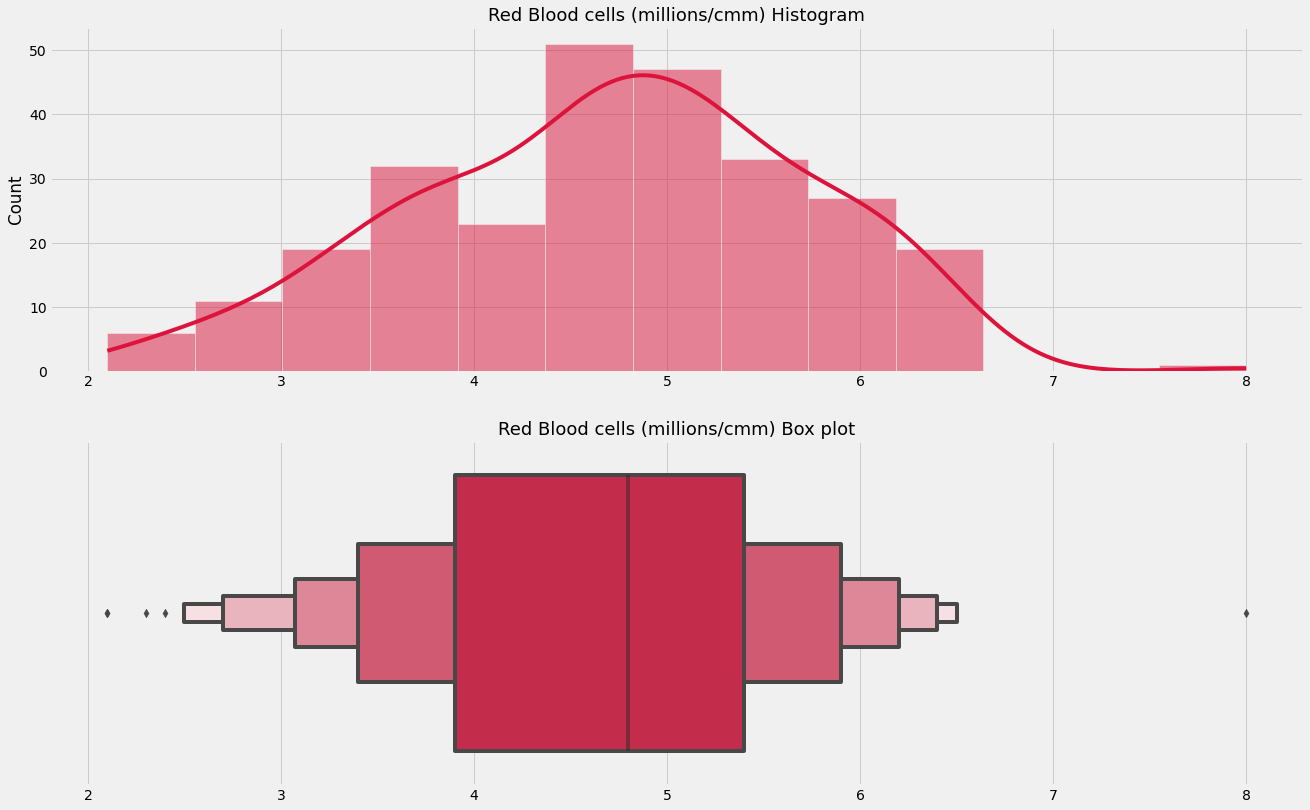

In [265]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Red Blood Cells (millions/cmm)", kde=True, color="crimson", ax=axes[0])
sns.boxenplot(data=data, x="Red Blood Cells (millions/cmm)", color="crimson", ax=axes[1])
axes[0].set_title("Red Blood cells (millions/cmm) Histogram", fontsize=18)
axes[1].set_title("Red Blood cells (millions/cmm) Box plot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

**From the above graph we can infer that the number of outliers are less so it would be best to impute the missing values with mean**

In [266]:
data["Red Blood Cells (millions/cmm)"].fillna(data["Red Blood Cells (millions/cmm)"].mean, inplace=True)

**For white blood cells**

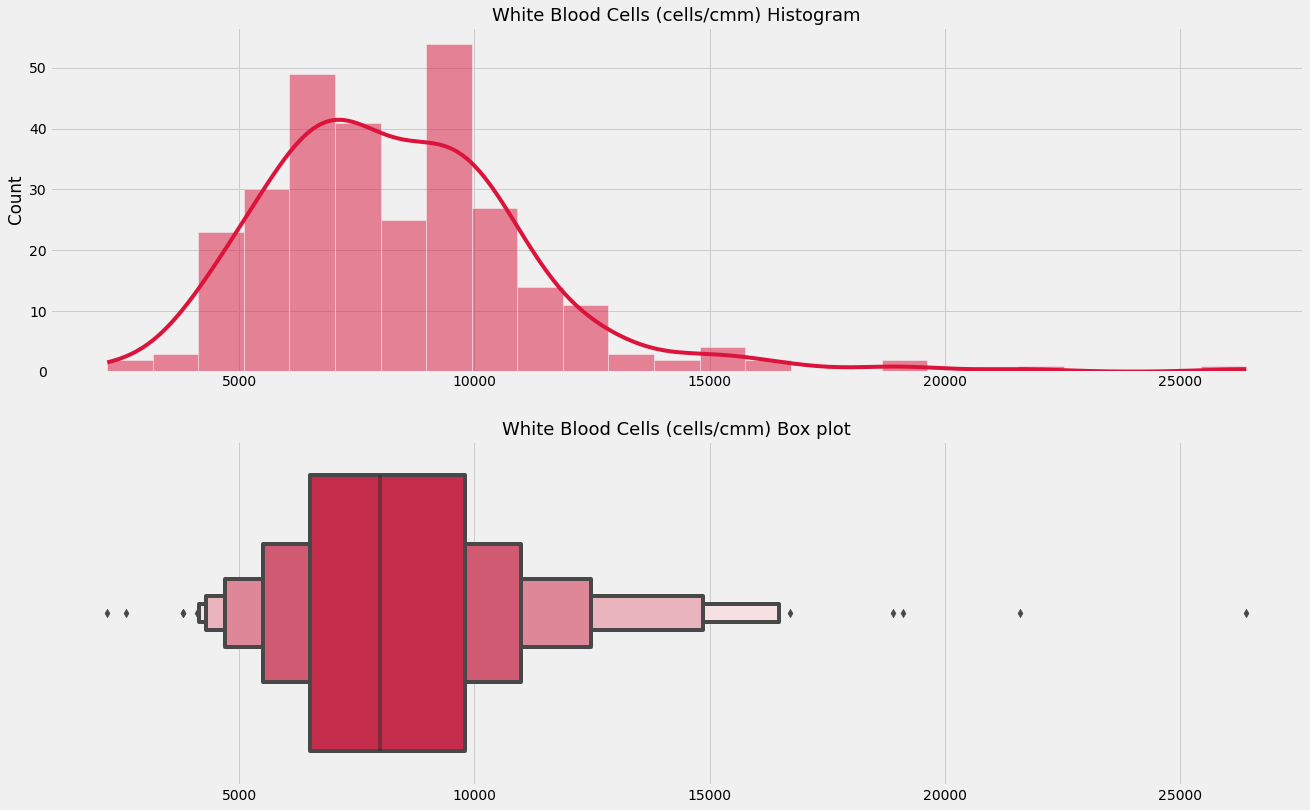

In [267]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="White Blood Cells (cells/cmm)", kde=True, color="crimson", ax=axes[0])
sns.boxenplot(data=data, x="White Blood Cells (cells/cmm)", color="crimson", ax=axes[1])
axes[0].set_title("White Blood Cells (cells/cmm) Histogram", fontsize=18)
axes[1].set_title("White Blood Cells (cells/cmm) Box plot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

 **From the above graph we can infer that the number of outliers are less so it would be best to impute the missing values with mean**

In [268]:
 data["White Blood Cells (cells/cmm)"].fillna(data["Red Blood Cells (millions/cmm)"].mean, inplace=True)

**For the rest of the continues attributes we can use either median or mode for imputation**

In [269]:
numerical=[]
for col in data.columns:
    if data[col].dtype=="float64":
        numerical.append(col)
print(numerical)

['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume']


In [270]:
for col in numerical:     
        data[col].fillna(data[col].median(), inplace=True)

**For catogorical variables we impute the null values with mode**

In [271]:
categorical=[]
for col in data.columns:
    if data[col].dtype=="object":
        categorical.append(col)
print(categorical)

['Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease', 'Blood_Type']


In [272]:
for col in categorical:     
        data[col].fillna(data[col].mode()[0], inplace=True)

In [273]:
d1 = pd.DataFrame(columns=['Red Blood Cells (millions/cmm)'] )
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Red Blood Cells (millions/cmm)  0 non-null      object
dtypes: object(1)
memory usage: 0.0+ bytes


**Now all the missing values are handled appropriately now we will look into catogorical variables**

In [274]:
data['Chronic Kidney Disease'] = data['Chronic Kidney Disease'].map({'ckd':1,'notckd':0})
data['Hypertension'] = data['Hypertension'].map({'yes':1,'no':0})
data['Diabetes Mellitus'] = data['Diabetes Mellitus'].map({'yes':1,'no':0})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].map({'yes':1,'no':0})
data['Appetite'] = data['Appetite'].map({'good':1,'poor':0})
data['Anemia'] = data['Anemia'].map({'yes':1,'no':0})
data['Pedal Edema'] = data['Pedal Edema'].map({'yes':1,'no':0})
data['Bacteria'] = data['Bacteria'].map({'present':1,'notpresent':0})
data['Pus Cell Clumps'] = data['Pus Cell Clumps'].map({'present':1,'notpresent':0})
data['Pus Cells'] = data['Pus Cells'].map({'abnormal':1,'normal':0})
data['Red Blood Cells'] = data['Red Blood Cells'].map({'abnormal':1,'normal':0})
data['Chronic Kidney Disease'].value_counts()

1    250
0    150
Name: Chronic Kidney Disease, dtype: int64

**Now handling the blood types we use numerical encoding**

In [275]:
encoder = LabelEncoder()
data["Blood_Type" ]=encoder.fit_transform(data["Blood_Type"])

In [276]:
data["Blood_Type"].value_counts()

3    106
2    104
1     97
0     93
Name: Blood_Type, dtype: int64

## Bi variate Analysis

<AxesSubplot:>

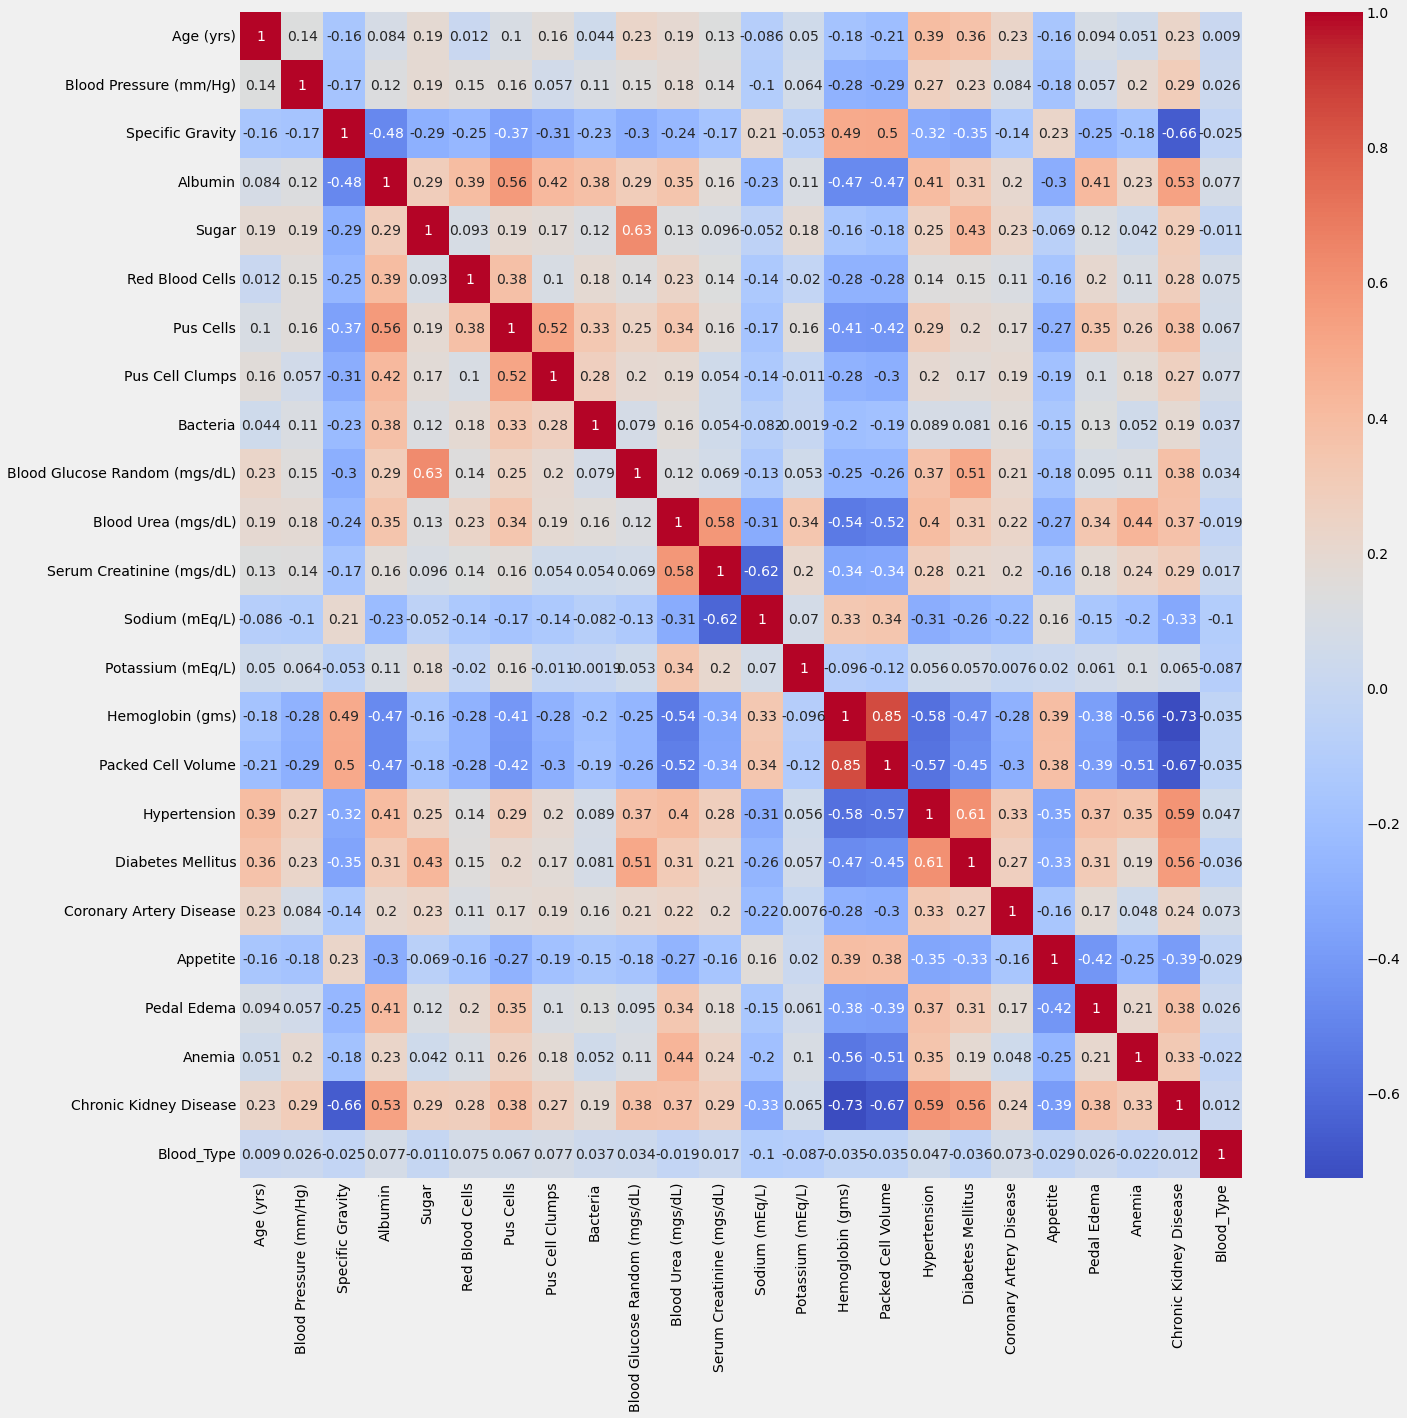

In [277]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

**Now lets find the dependence between catogorical attributes and the target classification**

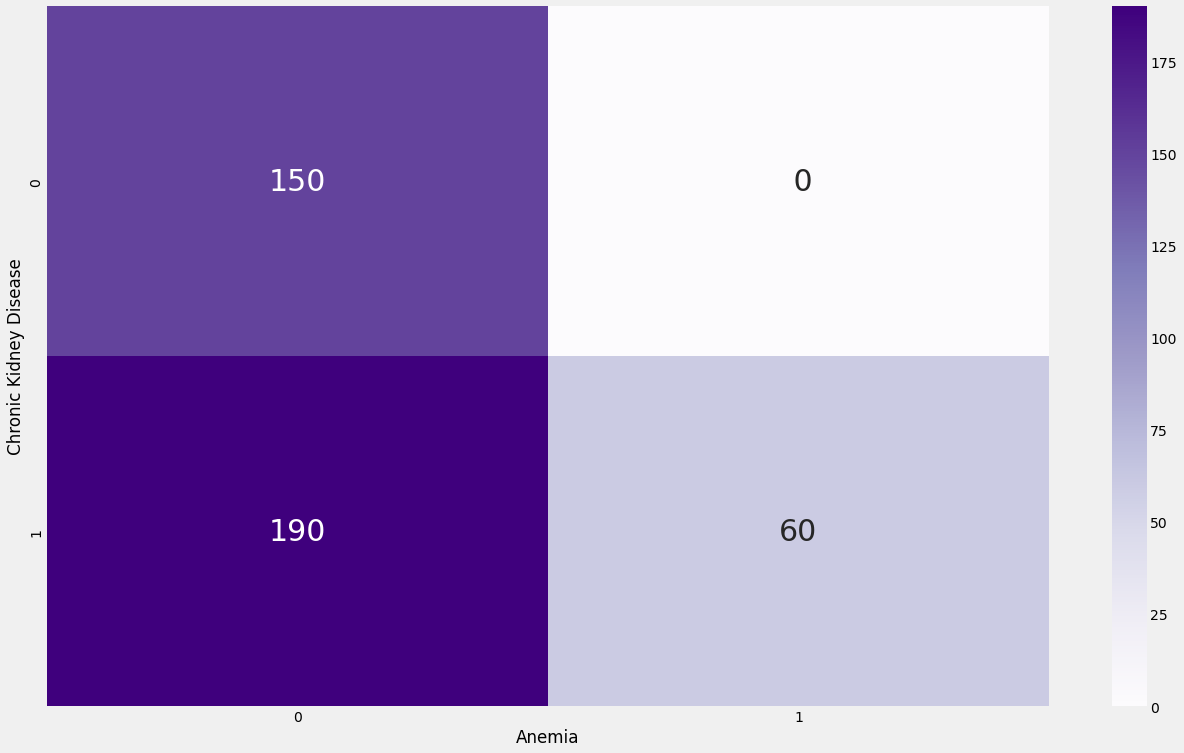

In [278]:
 plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Anemia']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

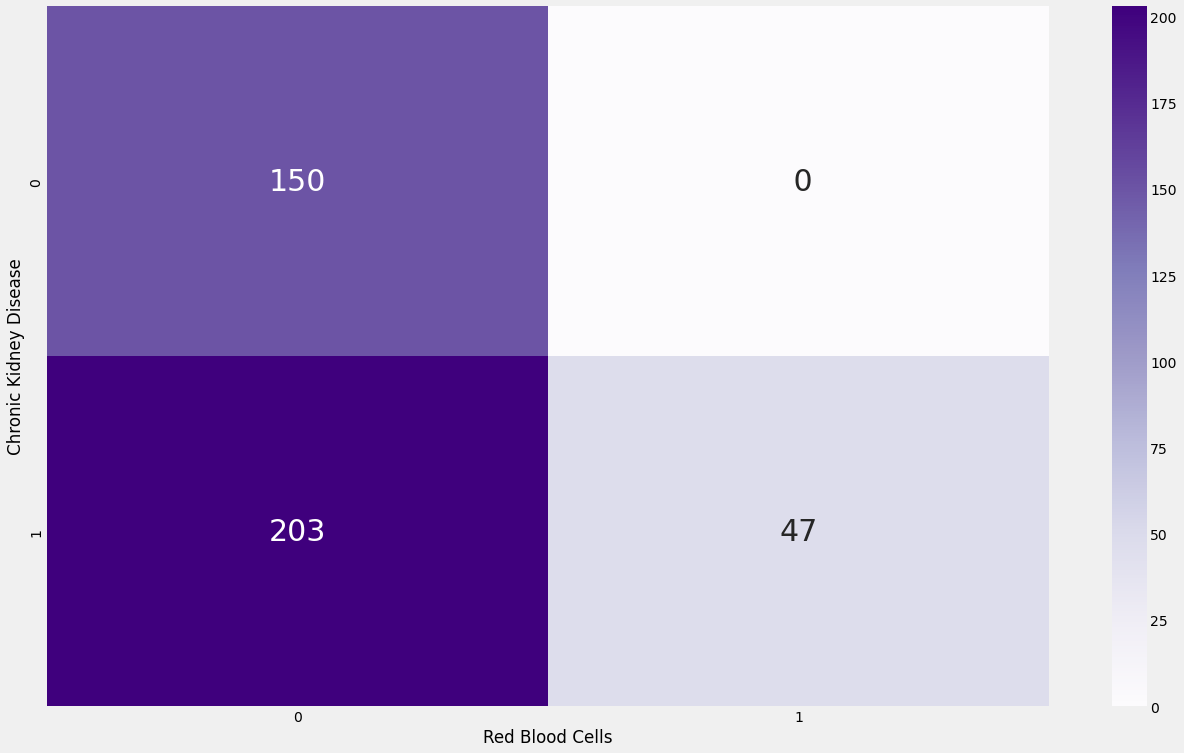

In [279]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Red Blood Cells']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

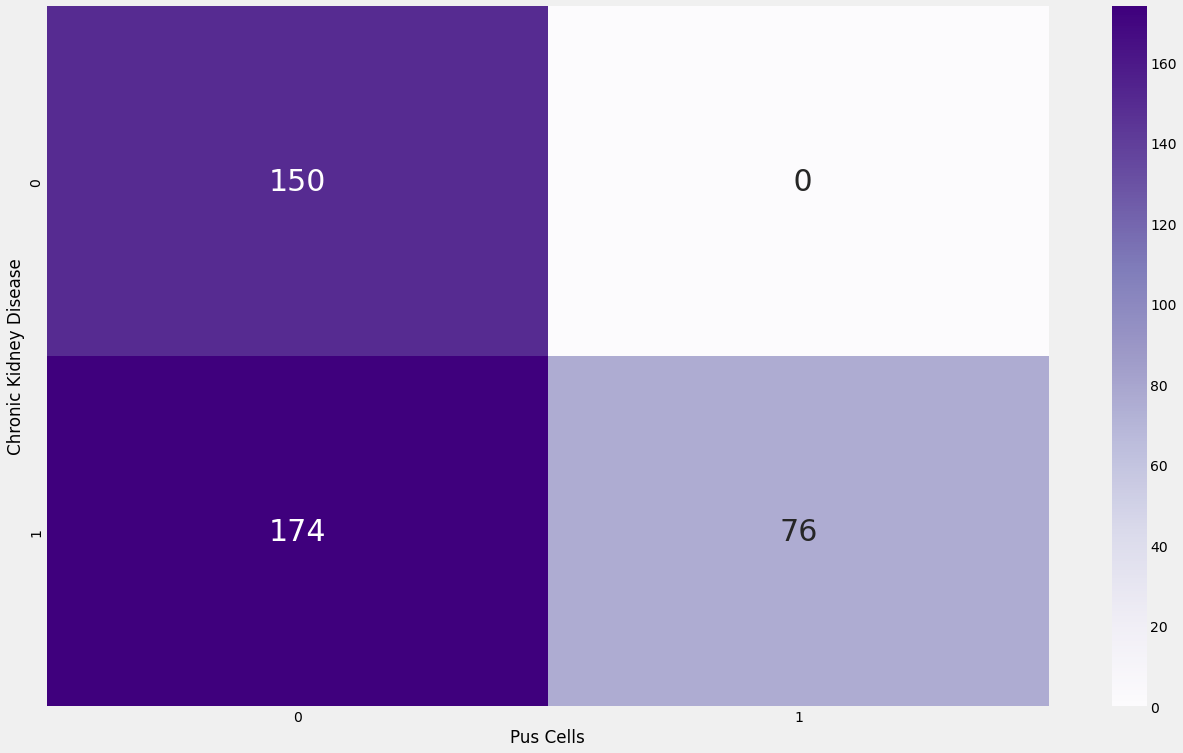

In [280]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Pus Cells']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

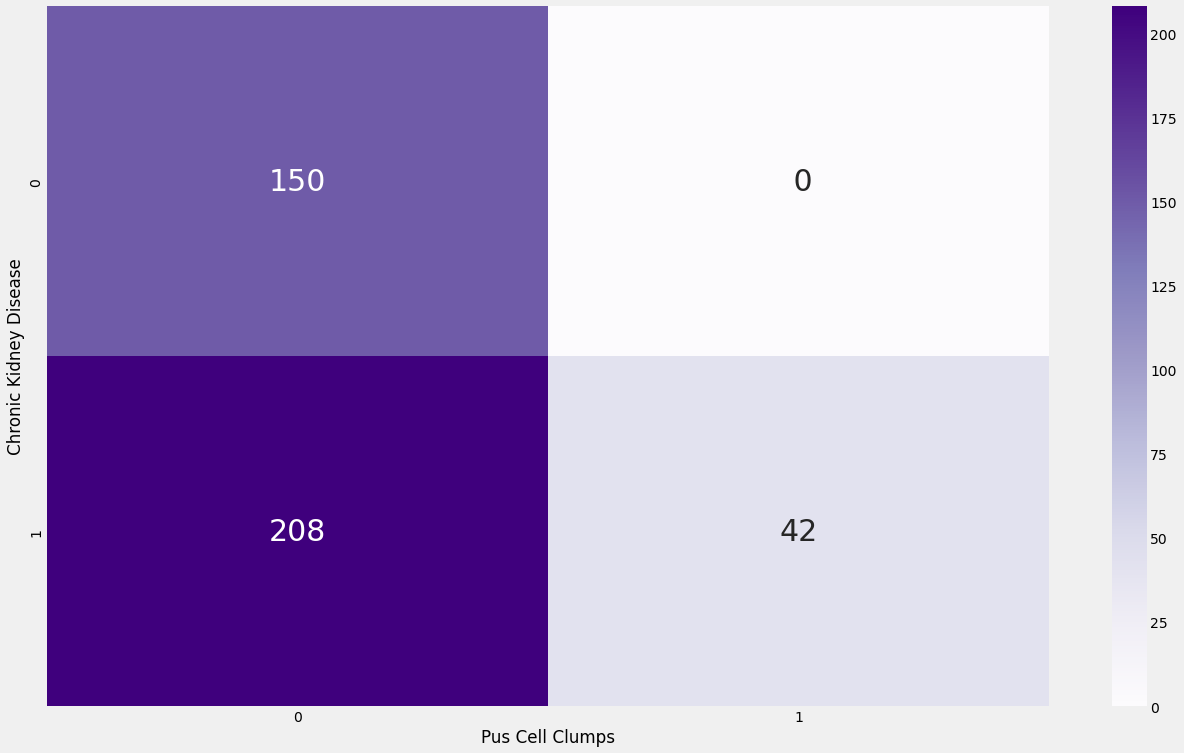

In [281]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Pus Cell Clumps']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

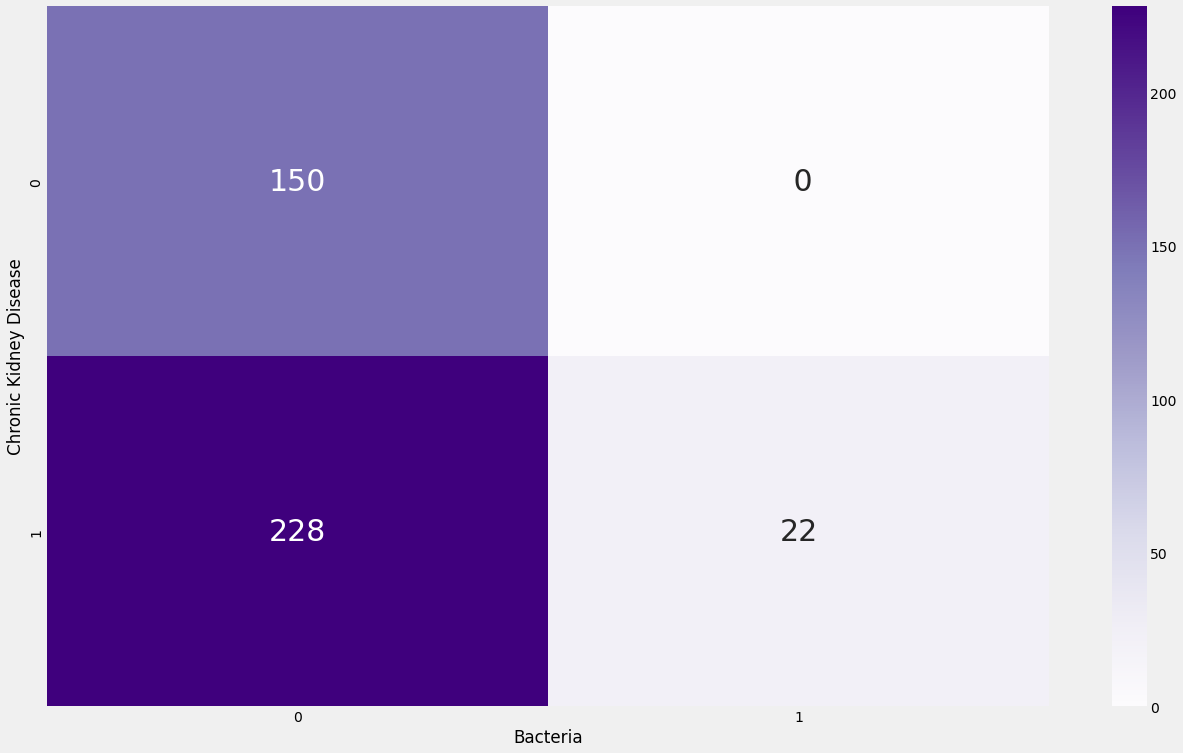

In [282]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Bacteria']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

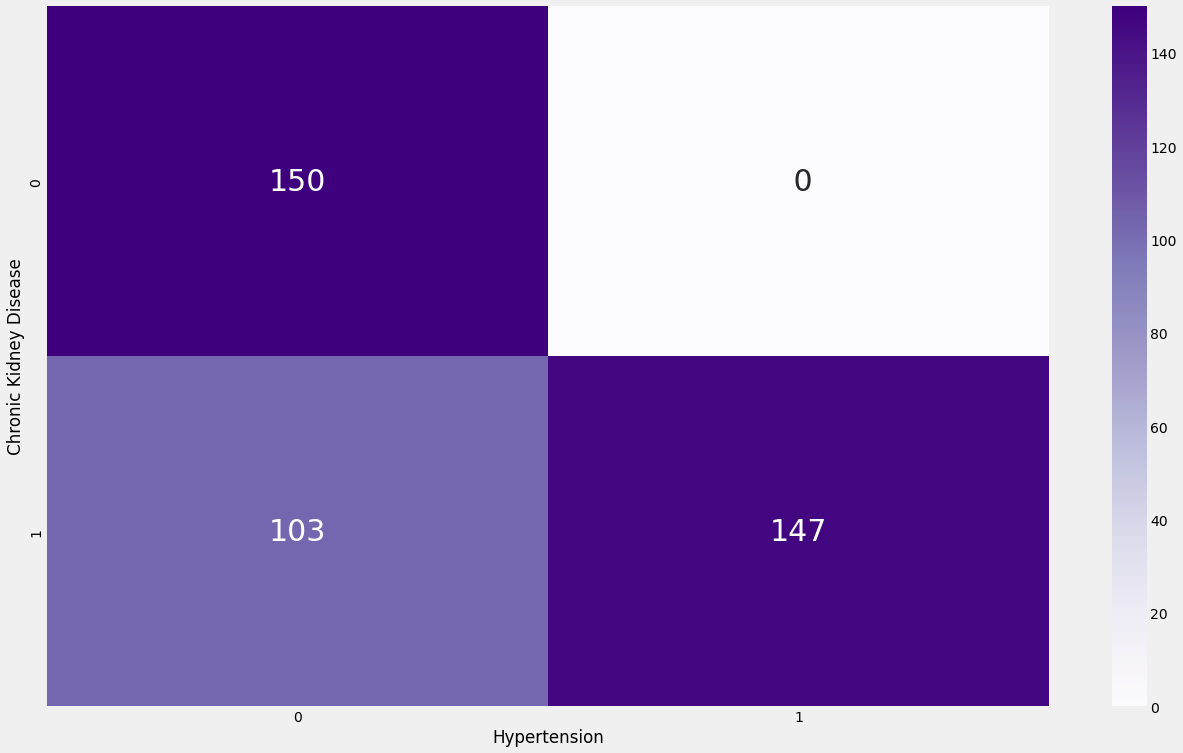

In [283]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Hypertension']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

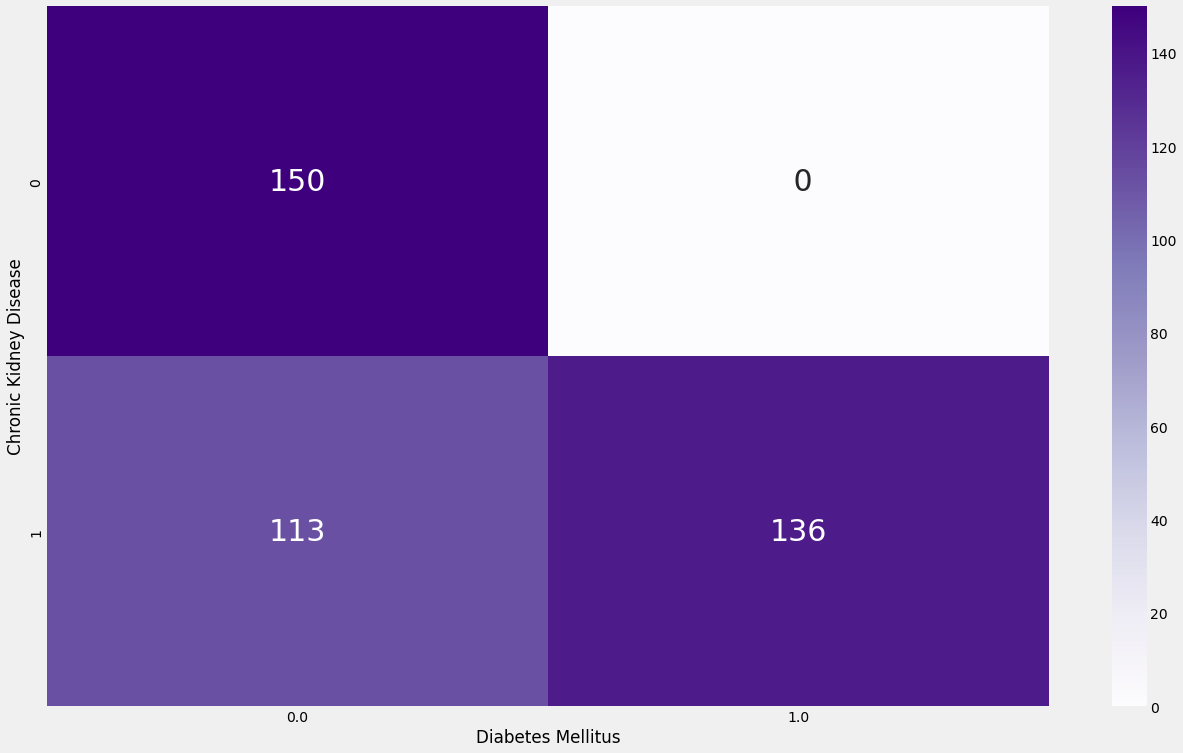

In [284]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Diabetes Mellitus']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

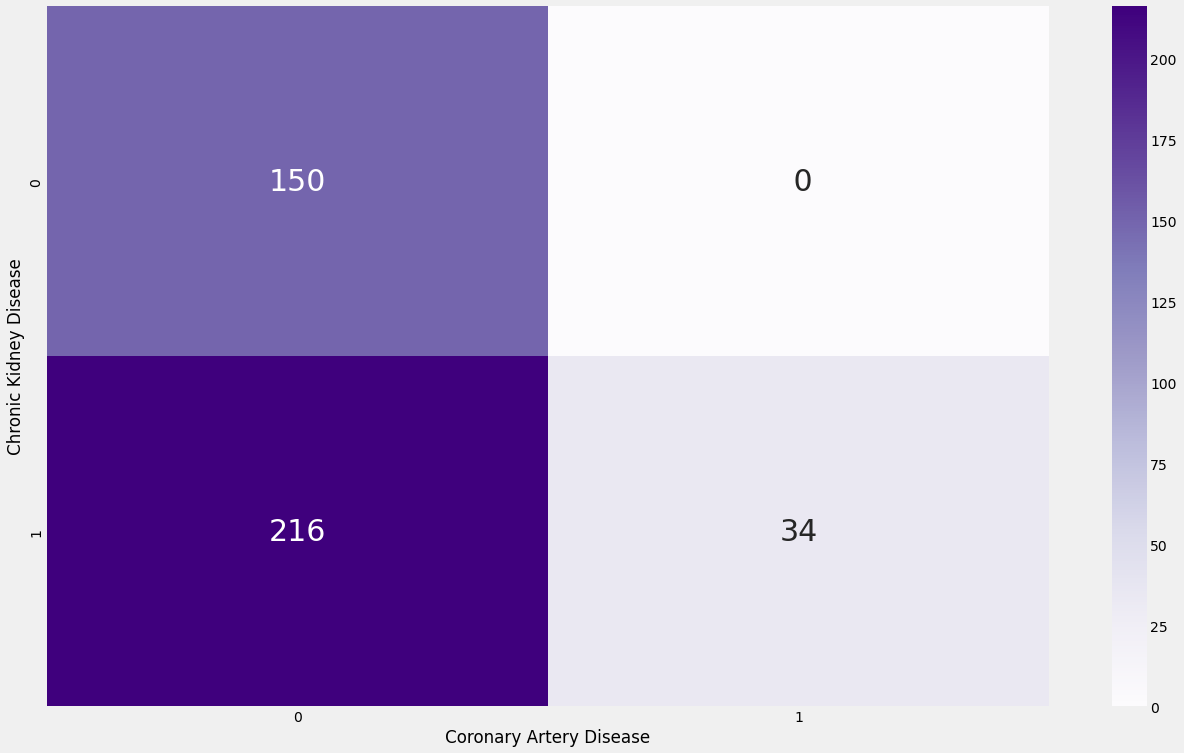

In [285]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Coronary Artery Disease']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

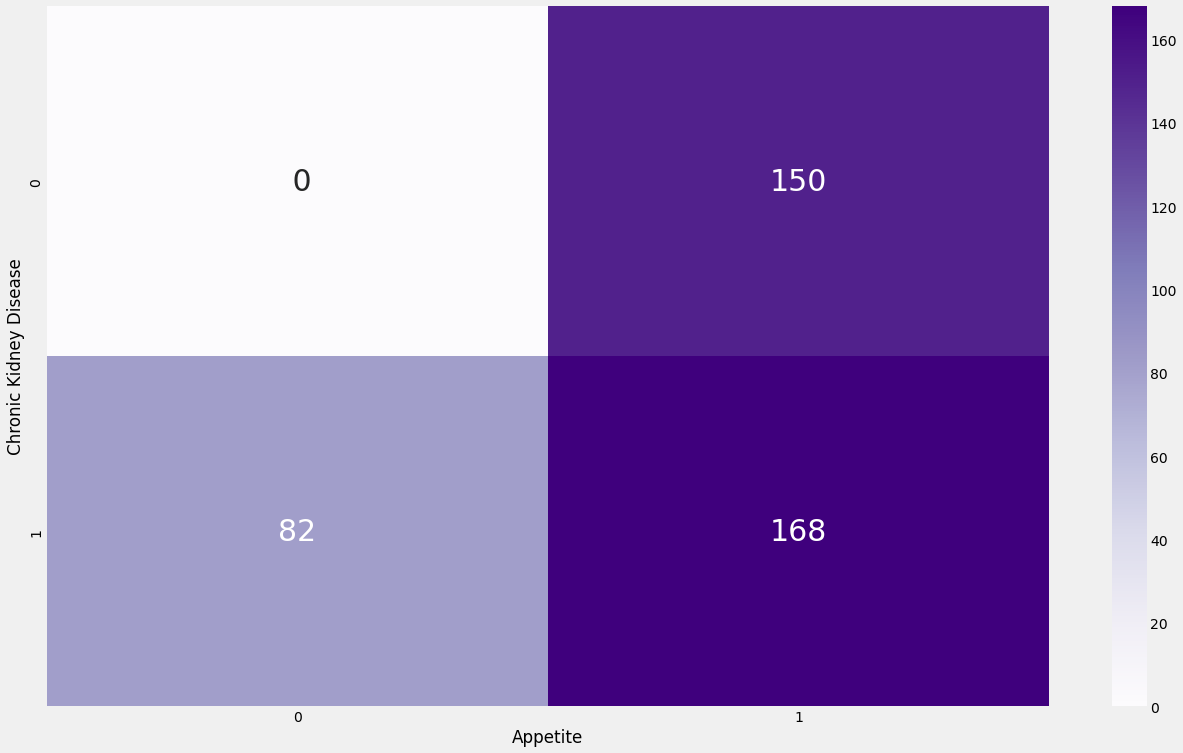

In [286]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Appetite']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

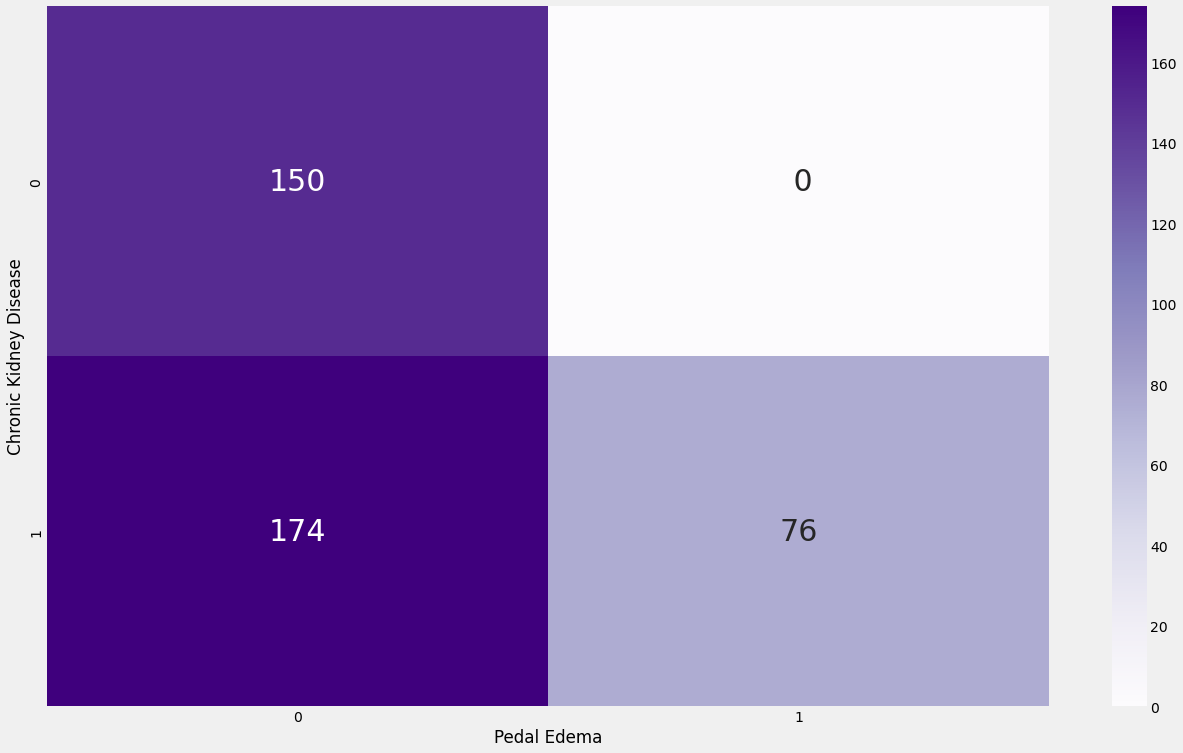

In [287]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Pedal Edema']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

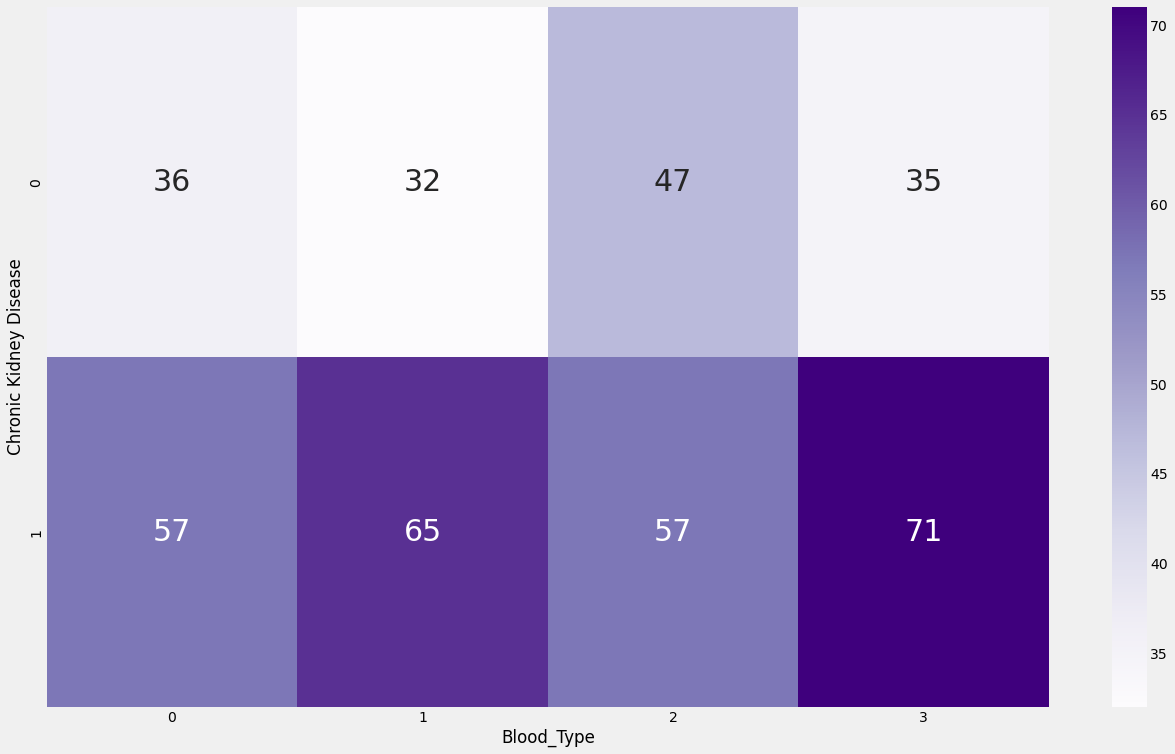

In [288]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Blood_Type']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

In [289]:
features =  data.drop(columns=['Chronic Kidney Disease','Diabetes Mellitus','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)'], axis=1)
 

In [290]:
X_train, X_test, y_train, y_test = train_test_split(features, data['Chronic Kidney Disease'], 
                                                    test_size = 0.30)

In [291]:
def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [292]:
#svm1 = svm.SVC(kernel='linear') 
#svm1.fit(X_train, y_train)
#y_pred1 = svm1.predict(X_test)
 

In [293]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

In [294]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
 

(280, 22)
(120, 22)
(280,)


In [295]:

data.isnull().sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 1
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
Blood_Type                        0
dtype: int64

In [296]:
 
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train,y_train)
 

""" 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train,y_train)
print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_
""" 

' \n \n# Training the model on the training dataset\n# fit function is used to train the model using the training sets as parameters\nclf.fit(X_train,y_train)\nprint("Detailed classification report:")\ny_true, lr_pred = y_test, clf.predict(X_test)\nprint(classification_report(y_true, lr_pred))\n\nconfusion = confusion_matrix(y_test, lr_pred)\nprint(\'Confusion Matrix:\')\nprint(confusion)\n\n# Determine the false positive and true positive rates\nfpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, \'RF\')\n\nprint(\'Best parameters:\')\nprint(clf.best_params_)\nclf_best = clf.best_estimator_\n'

Detailed classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

Confusion Matrix:
[[44  0]
 [ 2 74]]
Accuracy: 0.983333


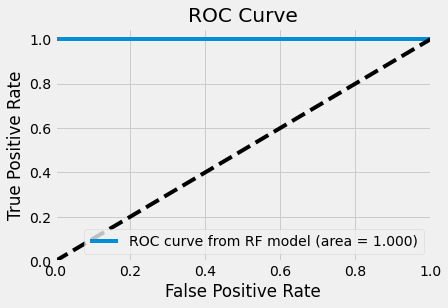

Best parameters:
{'class_weight': 'balanced', 'max_depth': 6, 'n_estimators': 14, 'random_state': 42}


In [297]:

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_true, lr_pred))
# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')



print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

Text(0.5, 1.0, 'Feature Importance')

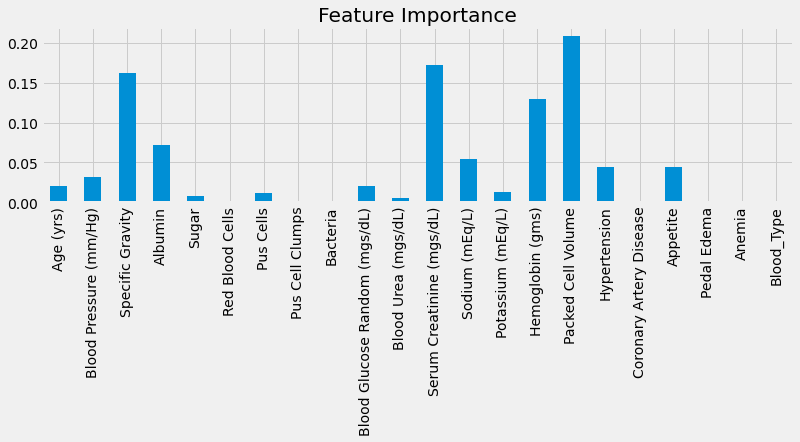

In [298]:
plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [299]:
list_to_fill = X_test.columns[feature_series>0]
print(list_to_fill)

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Pus Cells', 'Blood Glucose Random (mgs/dL)',
       'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)',
       'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume',
       'Hypertension', 'Appetite', 'Pedal Edema', 'Anemia', 'Blood_Type'],
      dtype='object')


In [300]:
X_train, X_test, y_train, y_test = train_test_split(data[list_to_fill], data['Chronic Kidney Disease'], 
                                                    test_size = 0.30)

In [301]:


svm1 = svm.SVC(kernel='linear') 
svm1.fit(X_train, y_train)
y_pred1 = svm1.predict(X_test)

In [302]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.975
